In [8]:
import os
from glob import glob

import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
os.listdir('/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl')


['sub-cntrl02',
 'sub-cntrl05',
 'sub-cntrl04',
 'sub-cntrl03',
 'sub-cntrl10',
 'sub-cntrl11',
 'sub-cntrl06',
 'sub-cntrl01',
 'sub-cntrl08',
 'sub-cntrl09',
 'sub-cntrl07',
 'sub-cntrl14',
 'sub-cntrl13',
 'sub-cntrl12']

In [3]:
ctrl_data_paths = glob('/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/*/anat/*')
ctrl_data_paths[-1]

'/Users/jeonghyeonjeong/ds001354-download/dataset/cntrl/sub-cntrl12/anat/sub-cntrl12_T1w.nii'

### 1. Before Preprocess 의 과정을 함수로 만들기

In [25]:
def Before_Preprocess(data):
    
    brain_image = nib.load(data) #Get nibabel image object
    brain_image = brain_image.get_data() #Get data from nibabel image object
    brain_image_arr = np.asarray(brain_image) #convert to numpy ndarray(dtype : uint16)
    print(brain_image_arr.shape)
    #plotting single image
    #1. Initialize figure and axes
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #2. plot slices of volume
    brain_slice = brain_image_arr[120, :, :]
    ax.imshow(brain_slice, cmap = 'gray')
    
    #3. Edit axes and display figure
    ax.axis('off')
    plt.show()
    
    return brain_slice
    

(256, 256, 176)


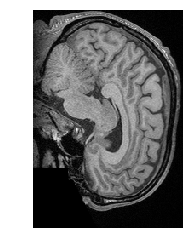

(256, 176)

In [26]:
###test####
data = ctrl_data_paths[-1]
image = Before_Preprocess(data)
image.shape

(256, 256, 176)


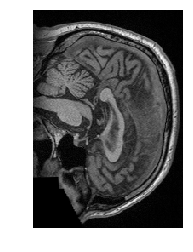

(256, 256, 176)


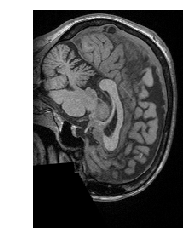

(256, 256, 176)


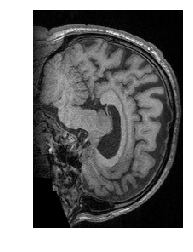

(256, 256, 176)


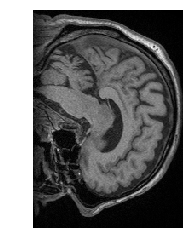

(256, 256, 176)


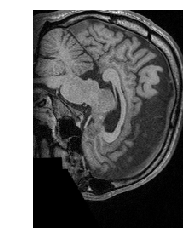

(256, 256, 176)


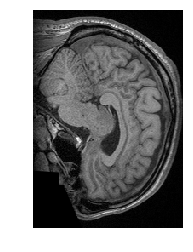

(256, 256, 176)


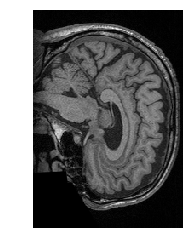

(256, 256, 176)


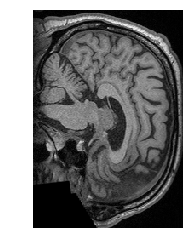

(256, 256, 176)


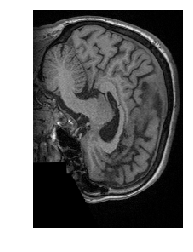

(256, 256, 176)


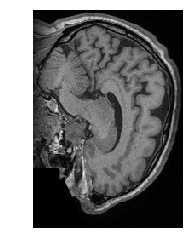

(256, 256, 176)


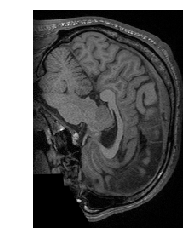

(256, 256, 176)


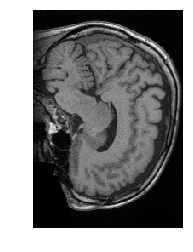

(256, 256, 176)


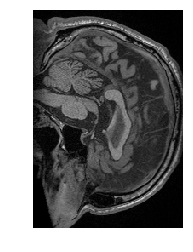

(256, 256, 176)


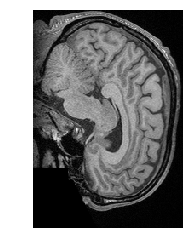

In [27]:
# ctrl_data_path에 있는 이미지데이터들을 모두 Before_Preprocess 함수 처리 해수기
ctrl_images = []

for image in ctrl_data_paths:
    image = Before_Preprocess(image)
    ctrl_images.append(image)
    

In [28]:
#하나의 array로 만들어주기
np.array(ctrl_images).shape

(14, 256, 176)

In [30]:
#하나의 tensor로 만들어주기
ctrl_image_tensor = tf.convert_to_tensor(ctrl_images)
ctrl_image_tensor.shape

TensorShape([14, 256, 176])

(256, 256, 176)


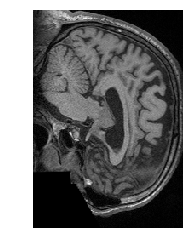

(256, 256, 176)


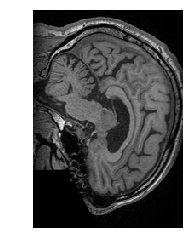

(256, 256, 176)


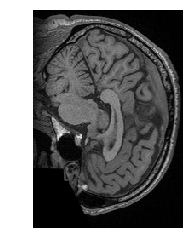

(256, 256, 176)


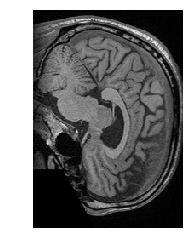

(256, 256, 176)


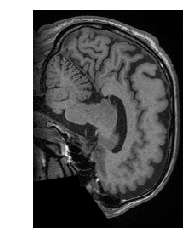

(256, 256, 176)


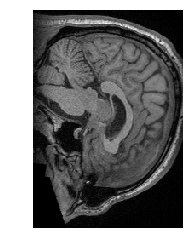

(256, 256, 176)


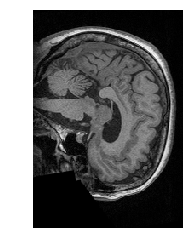

(256, 256, 176)


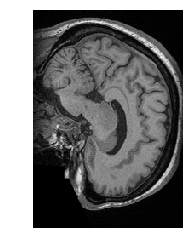

(256, 256, 176)


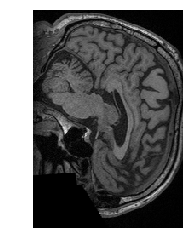

(256, 256, 176)


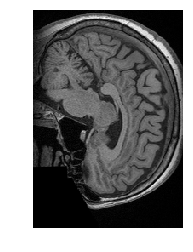

(256, 256, 176)


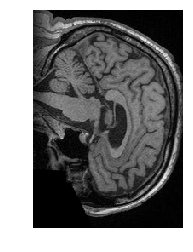

(256, 256, 176)


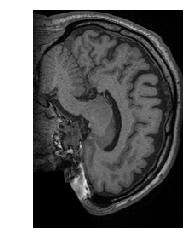

(256, 256, 176)


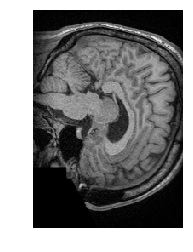

(256, 256, 176)


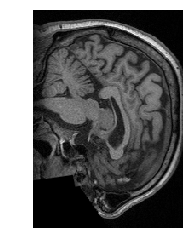

TensorShape([14, 256, 176])

In [32]:
#pddn_image_tensor도 마찬가지로 만들어주기
pddn_data_paths = glob('/Users/jeonghyeonjeong/ds001354-download/dataset/pddn/*/anat/*')
pddn_data_paths[-1]

# pddn_data_path에 있는 이미지데이터들을 모두 Before_Preprocess 함수 처리 해수기
pddn_images = []

for image in pddn_data_paths:
    image = Before_Preprocess(image)
    pddn_images.append(image)
    
#하나의 array로 만들어주기
np.array(pddn_images).shape

#하나의 tensor로 만들어주기
pddn_image_tensor = tf.convert_to_tensor(pddn_images)
pddn_image_tensor.shape
